In [4]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
         
# Define the number of features
num_channels = 24
num_features = 101

# Create an array to store the training data
num_samples_per_class = 100  # One sample per class
training_data = np.zeros((num_samples_per_class * 3, num_channels, num_features))

# Create three distinct patterns for each class with unique randomness
np.random.seed(0)  # Set a global seed for reproducibility
pattern1 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

np.random.seed(1)  # Set a unique seed for the first class
pattern2 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

np.random.seed(2)  # Set a unique seed for the second class
pattern3 = (2 * np.random.rand(num_samples_per_class, num_channels, num_features)) - 1

# Assign each pattern to a class
training_data[:num_samples_per_class] = pattern1
training_data[num_samples_per_class:2*num_samples_per_class] = pattern2
training_data[2*num_samples_per_class:] = pattern3

# You can also assign labels to each class
labels = np.array([0] * num_samples_per_class + [1] * num_samples_per_class + [2] * num_samples_per_class)

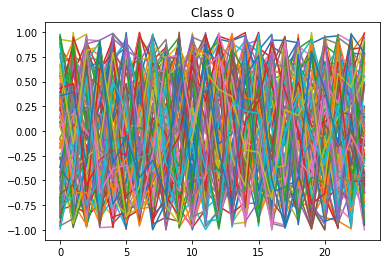

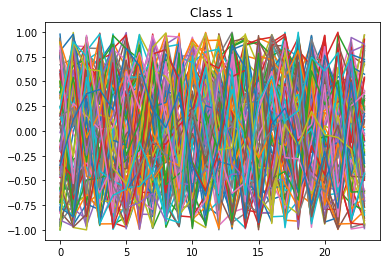

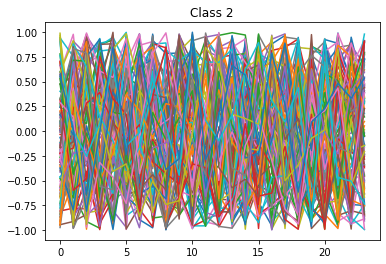

In [5]:
# Specify the directory where you want to save the data
save_dir = "/home/jacobo/Eirik/dataset"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Save each sample as a separate pickle file
for i in range(len(training_data)):
    sample_data = training_data[i]
    sample_label = labels[i]
    
    sample_dict = {
        "data": sample_data,
        "label": sample_label
    }
    
    sample_filename = f"sample_{i}.pkl"
    sample_filepath = os.path.join(save_dir, sample_filename)
    
    with open(sample_filepath, "wb") as file:
        pickle.dump(sample_dict, file)

# Visualize one sample from each class
for class_label in range(3):
    sample_idx = np.where(labels == class_label)[0][0]
    sample = training_data[sample_idx]
    
    plt.figure()
    plt.plot(sample)
    plt.title(f"Class {class_label}")
    plt.show()


## Read one sample

In [16]:
from pprint import pprint

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pickle_file_path: str = "/home/jacobo/Eirik/dataset/sample_143.pkl"
my_df = pd.read_pickle(pickle_file_path)

""" Saving to dataframe converted the numpy arrays to strings, so we need to convert from string to numpy array"""
signal: np.ndarray = my_df["data"]
print(my_df["label"])

1


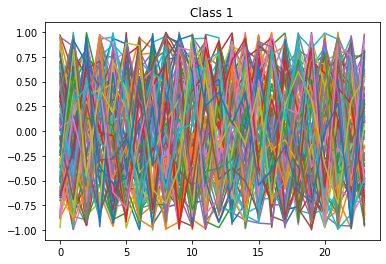

In [18]:
plt.figure()
plt.plot(signal)
plt.title(f"Class {my_df['label']}")
plt.show()

In [22]:
data_folder = "/home/jacobo/Eirik/dataset"

In [64]:
# Find the folders with data files.
def find_file_names(data_folder):
    data_files = list()
    for x in sorted(os.listdir(data_folder)):
        data_file = os.path.join(data_folder, x)
        if os.path.isfile(data_file):
            data_files.append(data_file)
    return sorted(data_files)

In [71]:
from sklearn.model_selection import train_test_split

def load_train_val_files(data_folder, split=True, split_ratio=0.1):
    
    file_ids = find_file_names(data_folder)
    num_files = len(file_ids)

    if num_files==0:
        raise FileNotFoundError('No data was provided.')

    if split:
        X_train, X_val = train_test_split(file_ids, test_size=split_ratio, 
                                        shuffle=True, random_state=42)
        return X_train, X_val
    else:
        X_train = file_ids
        return X_train

In [89]:
from torch.utils.data import Dataset
import torch
class dataset(Dataset):
    def __init__(self, config, data_folder, X_files, device, train=True):
        self.X_files = X_files
        self.train=train
        self.data_folder = data_folder
        self.device = device
        self.config = config 

    def __len__(self):
        return len(self.X_files)

    def __getitem__(self, idx):
        file_ids = self.X_files[idx]
        my_df = pd.read_pickle(file_ids)
        return my_df

In [90]:
X_train, X_val = load_train_val_files(data_folder, split=True, split_ratio=0.1)

In [91]:
len(X_train)

270

In [92]:
len(X_val)

30

In [93]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = 1

In [94]:
trainset = dataset(config, data_folder, X_train, device)

In [95]:
trainset

In [102]:
for step, data in enumerate(trainset):
    x, y = data["data"], data["label"]
    print("="*10)
    print(x.shape)
    print(y)

(24, 101)
1
(24, 101)
2
(24, 101)
1
(24, 101)
0
(24, 101)
2
(24, 101)
2
(24, 101)
1
(24, 101)
0
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
1
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
1
(24, 101)
0
(24, 101)
0
(24, 101)
1
(24, 101)
0
(24, 101)
2
(24, 101)
2
(24, 101)
0
(24, 101)
1
(24, 101)
0
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
2
(24, 101)
1
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
2
(24, 101)
2
(24, 101)
1
(24, 101)
1
(24, 101)
0
(24, 101)
1
(24, 101)
2
(24, 101)
1
(24, 101)
2
(24, 101)
0
(24, 101)
2
(24, 101)
2
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
1
(24, 101)
0
(24, 101)
2
(24, 101)
2
(24, 101)
1
(24, 101)
0
(24, 101)
0
(24, 101)
2
(24, 101)
2
(24, 101)
1
(24, 101)
1
(24, 101)
1
(24, 101)
2
(24, 101)
0
(24, 101)
0
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
0
(24, 101)
2
(24, 101)
0
(24, 101)
1
(24, 101)
0
(24, 101)
1
(24, 101)
1
(24, 101)
2
(24, 101)
0
(24, 101)
0
(24, 101)
2
(24, 101)
1
(24, 101)
2
(24, 101)
1
(24, 101)
2
(24, 101)
0
(24, 101)
1
(24,